In [1]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

### XGBOOST

In [2]:
df_train = pd.read_csv('../data/train_con_features.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('../data/test_con_features.csv', index_col='Unnamed: 0')
display(df_train.head())

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,estado_descripcion,seguridad_titulo,moderno_titulo,hermoso_titulo,estado_titulo,cantidad_palabras_descripcion,relacion_palabras_descripcion,es_avenida,es_ciudad_capital,ciudad_turistica_top15
0,254099,depto tipo a 402,depto interior de 80 15m2 consta de sala com...,Apartamento,avenida division del norte 2005,Benito Juárez,Distrito Federal,8.116114,2.0,1.0,...,0,0,0,0,0,0,0.000000,1,0,0
1,53461,condominio horizontal en venta,p entre sonora y guerrero atr aacute s del h...,Casa en condominio,av mexico,La Magdalena Contreras,Distrito Federal,10.000000,3.0,2.0,...,1,0,0,0,0,1,0.007968,1,0,0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion la mejor ubicacion residencial en...,Casa,urbi tonala,Tonalá,Jalisco,5.000000,3.0,2.0,...,4,0,0,0,0,10,0.046957,0,0,0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,ignacio manuel altamirano 128,Zinacantepec,Edo. de México,1.000000,2.0,1.0,...,0,0,0,0,0,0,0.000000,0,0,0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,paseos del sol,Zapopan,Jalisco,10.000000,2.0,1.0,...,1,0,0,0,0,1,0.074108,0,0,0


In [3]:
lst_propiedades = ['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 
                   'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
                   'metros_por_bano', 'metros_por_amenities', 'es_avenida']

lst_tipos_propiedades = ['es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno',
                         'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional',
                         'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo',
                         'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros',
                         'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos',
                         'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho',
                         'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage']

lst_cantidad_palabras = ['seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 
                         'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo',
                         'relacion_palabras_descripcion', 'cantidad_palabras_descripcion']

lst_ciudades = ['provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15']

columnas_numericas = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras
columnas_numericas_y_precio = lst_propiedades + lst_tipos_propiedades + lst_cantidad_palabras
columnas_numericas_y_precio.append('precio')

In [4]:
X = df_train[columnas_numericas_y_precio].drop(columns=['precio']).values
y = df_train['precio'].values

In [5]:
# Métrica de evaluación
#def RMSLE(actual, pred):
#    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

#XGBoost_rmsle = RMSLE(y_test, XGBoost_pred)
#XGBoost_rmsle_train = RMSLE(y_train, XGBoost_fit.predict(X_train))
#print(f"RMSLE XGBoost (train): {XGBoost_rmsle_train:.5f}")
#print(f"RMSLE XGBoost: {XGBoost_rmsle:.5f}")
#print("------------------------------")

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(156000, 52) (156000,)
(84000, 52) (84000,)


In [7]:
import xgboost as xgb
XGBoost = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, 
                           max_depth = 5, alpha = 10, n_estimators = 500)

XGBoost_fit = XGBoost.fit(X_train, y_train)

In [8]:
XGBoost_pred = XGBoost_fit.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

XGBoost_mae = mean_absolute_error(y_test, XGBoost_pred)
XGBoost_mae_train = mean_absolute_error(y_train, XGBoost_fit.predict(X_train))
print(f"MAE XGBoost (train): {XGBoost_mae_train:.5f}")
print(f"MAE XGBoost: {XGBoost_mae:.5f}")
print("------------------------------")

MAE XGBoost (train): 831844.54962
MAE XGBoost: 849460.87647
------------------------------


In [10]:
XGBoost_fit.feature_importances_

array([0.0109687 , 0.02921638, 0.03202271, 0.11131078, 0.09448053,
       0.04838016, 0.04074614, 0.01636516, 0.00901704, 0.00569906,
       0.00751187, 0.0148196 , 0.00626618, 0.02098446, 0.07634597,
       0.0241437 , 0.01086697, 0.00272044, 0.14783011, 0.01404726,
       0.07910813, 0.06066102, 0.00652345, 0.00413706, 0.00269697,
       0.00820608, 0.04574181, 0.00293043, 0.00122093, 0.00921683,
       0.00235778, 0.00149652, 0.        , 0.00222104, 0.00209416,
       0.00242589, 0.00278667, 0.00225811, 0.00181814, 0.00071623,
       0.        , 0.        , 0.00267764, 0.00326629, 0.00773249,
       0.00281849, 0.0016449 , 0.00147173, 0.00329666, 0.0015111 ,
       0.00378337, 0.00943691], dtype=float32)

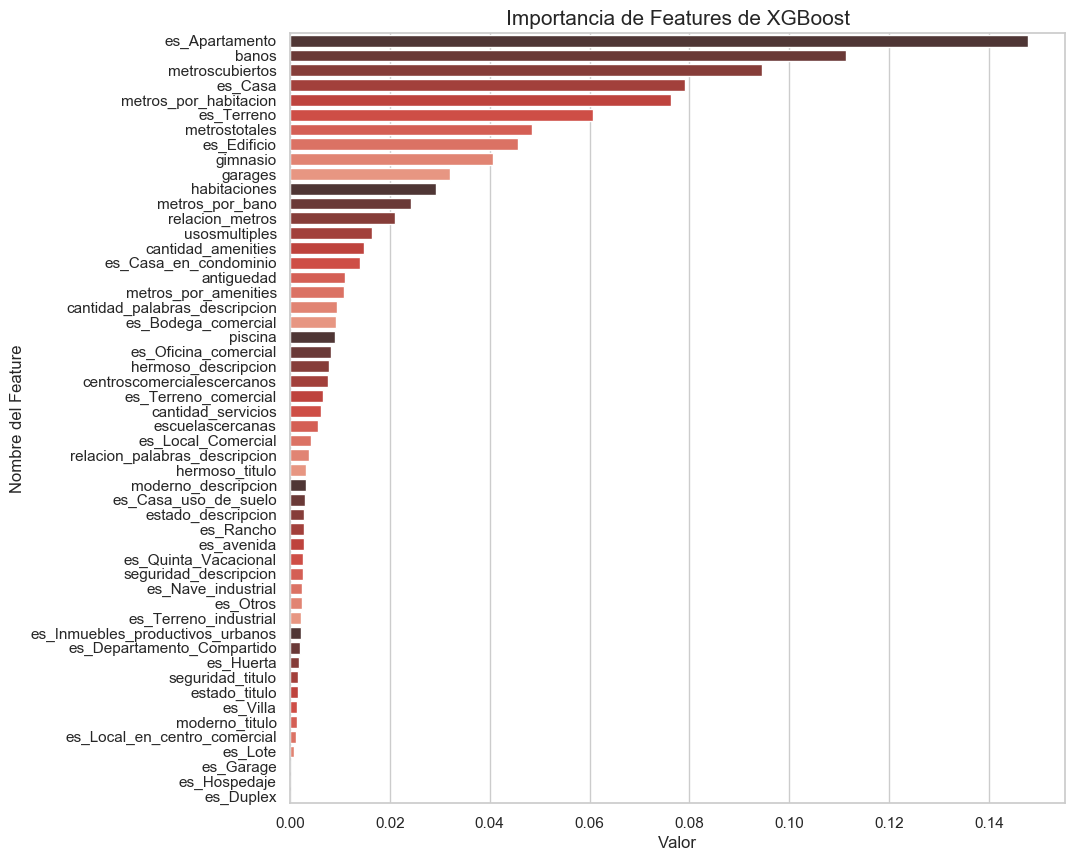

In [11]:
features = pd.DataFrame(index=columnas_numericas)
features['imp'] = XGBoost_fit.feature_importances_
features = features.sort_values(['imp'], ascending = False)
features

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(style="whitegrid")

g = sns.barplot(y=features.index, x=features.imp, \
                palette=sns.color_palette("Reds_d", 10));

g.set_title('Importancia de Features de XGBoost', fontsize=15);
g.set_xlabel('Valor');
g.set_ylabel('Nombre del Feature');

In [14]:
df_train_sumbit = df_train[columnas_numericas_y_precio]
df_test_submit = df_test[columnas_numericas]
XGBoost_pred_sumbit = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, 
                           max_depth = 5, alpha = 10, n_estimators = 500)\
                        .fit(df_train_sumbit[columnas_numericas], df_train_sumbit['precio'])\
                        .predict(df_test_submit[columnas_numericas])

In [15]:
resultado_submit = pd.DataFrame(index=df_test.index)
resultado_submit['id'] = df_test['id']
resultado_submit['target'] = XGBoost_pred_sumbit
display(resultado_submit.head())
resultado_submit.to_csv('../data/sumbitXGBoost.csv',index=False)

,id,target
0,4941,4827170.000
1,51775,2016012.500
2,115253,2297743.250
3,299321,2463538.250
4,173570,533212.375


#### Score en Kaggle (features => score):
 **1.** *['antiguedad', 'habitaciones', 'garages', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios'] =>* ***1310457.48052*** con objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3
 
 **2.** *['antiguedad', 'habitaciones', 'garages', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios'] =>* ***1332492.86254*** con objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 100
 
 **3.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion', 'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion'] =>* ***881891.18436*** con objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 100

 **4.** *['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'cantidad_amenities', 'cantidad_servicios', 'relacion_metros', 'metros_por_habitacion',
'metros_por_bano', 'metros_por_amenities', 'es_avenida', 'es_Apartamento', 'es_Casa_en_condominio', 'es_Casa', 'es_Terreno', 'es_Terreno_comercial', 'es_Local_Comercial', 'es_Quinta_Vacacional', 'es_Oficina_comercial', 'es_Edificio', 'es_Casa_uso_de_suelo', 'es_Local_en_centro_comercial', 'es_Bodega_comercial', 'es_Otros', 'es_Villa', 'es_Duplex', 'es_Inmuebles_productivos_urbanos', 'es_Departamento_Compartido', 'es_Nave_industrial', 'es_Rancho', 'es_Terreno_industrial', 'es_Huerta', 'es_Lote', 'es_Hospedaje', 'es_Garage', 'seguridad_descripcion', 'moderno_descripcion', 'hermoso_descripcion', 'estado_descripcion', 'seguridad_titulo', 'moderno_titulo', 'hermoso_titulo', 'estado_titulo', 'relacion_palabras_descripcion', 'cantidad_palabras_descripcion', 'provincia_top5', 'es_ciudad_capital', 'ciudad_turistica_top15'] =>* ***846444.02590*** con objective='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05, max_depth = 5, alpha = 10, n_estimators = 500
